# Table of Content

1. Importing Libraries
2. Loading Data
3. Data Wrangling
4. Feature Selection using Correlation Matrix
5. Feature Selection using SelectKBest Method
6. Feature Selection using Extra Tree Classifier
7. Feature Engineering with BoxCox, Log, Min-Max and Standard transformation
8. Preparing data - Standardisation and Splitting
9. Prediction with Decision Tree , Random Forest , XG Boost


# Importing Libraries

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

# !pip install xgboost
import xgboost as xgb



from sklearn.metrics import  r2_score

# Loading Data

In [2]:
data = pd.read_csv("solar prediction.csv")

In [3]:
data.head(5)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11753 entries, 0 to 11752
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                11753 non-null  int64  
 1   Data                    11753 non-null  object 
 2   Time                    11752 non-null  object 
 3   Radiation               11752 non-null  float64
 4   Temperature             11752 non-null  float64
 5   Pressure                11752 non-null  float64
 6   Humidity                11752 non-null  float64
 7   WindDirection(Degrees)  11752 non-null  float64
 8   Speed                   11752 non-null  float64
 9   TimeSunRise             11752 non-null  object 
 10  TimeSunSet              11752 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1010.1+ KB


# Data Wrangling

In [5]:
df = data.copy()

In [6]:
# extract the date from the date_time format of the 'Data' parameter
df['Data'] = df['Data'].apply(lambda x : x.split()[0])

In [7]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00


In [8]:
# extract the date time features from the given parameter using date time python methods
df['Month'] = pd.to_datetime(df['Data']).dt.month
df['Day'] = pd.to_datetime(df['Data']).dt.day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second

In [9]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00,9,29,23.0,55.0,26.0
1,1475229023,9/29/2016,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00,9,29,23.0,50.0,23.0
2,1475228726,9/29/2016,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00,9,29,23.0,45.0,26.0
3,1475228421,9/29/2016,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00,9,29,23.0,40.0,21.0
4,1475228124,9/29/2016,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00,9,29,23.0,35.0,24.0


In [11]:
# extract sunrise and sunset information
df['risehour']=pd.to_datetime(df['TimeSunRise']).dt.hour
df['riseminutes']=pd.to_datetime(df['TimeSunRise']).dt.minute
df['sethour']=pd.to_datetime(df['TimeSunSet']).dt.hour
df['setminutes']=pd.to_datetime(df['TimeSunSet']).dt.minute

In [12]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second,risehour,riseminutes,sethour,setminutes
0,1475229326,9/29/2016,23:55:26,1.21,48.0,30.46,59.0,177.39,5.62,06:13:00,18:13:00,9,29,23.0,55.0,26.0,6.0,13.0,18.0,13.0
1,1475229023,9/29/2016,23:50:23,1.21,48.0,30.46,58.0,176.78,3.37,06:13:00,18:13:00,9,29,23.0,50.0,23.0,6.0,13.0,18.0,13.0
2,1475228726,9/29/2016,23:45:26,1.23,48.0,30.46,57.0,158.75,3.37,06:13:00,18:13:00,9,29,23.0,45.0,26.0,6.0,13.0,18.0,13.0
3,1475228421,9/29/2016,23:40:21,1.21,48.0,30.46,60.0,137.71,3.37,06:13:00,18:13:00,9,29,23.0,40.0,21.0,6.0,13.0,18.0,13.0
4,1475228124,9/29/2016,23:35:24,1.17,48.0,30.46,62.0,104.95,5.62,06:13:00,18:13:00,9,29,23.0,35.0,24.0,6.0,13.0,18.0,13.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11753 entries, 0 to 11752
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                11753 non-null  int64  
 1   Data                    11753 non-null  object 
 2   Time                    11752 non-null  object 
 3   Radiation               11752 non-null  float64
 4   Temperature             11752 non-null  float64
 5   Pressure                11752 non-null  float64
 6   Humidity                11752 non-null  float64
 7   WindDirection(Degrees)  11752 non-null  float64
 8   Speed                   11752 non-null  float64
 9   TimeSunRise             11752 non-null  object 
 10  TimeSunSet              11752 non-null  object 
 11  Month                   11753 non-null  int64  
 12  Day                     11753 non-null  int64  
 13  Hour                    11752 non-null  float64
 14  Minute                  11752 non-null

In [14]:
# drop the parameters that are not required after extracting the relevant information
df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis = 1, inplace = True)

In [15]:
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminutes,sethour,setminutes
0,1.21,48.0,30.46,59.0,177.39,5.62,9,29,23.0,55.0,26.0,6.0,13.0,18.0,13.0
1,1.21,48.0,30.46,58.0,176.78,3.37,9,29,23.0,50.0,23.0,6.0,13.0,18.0,13.0
2,1.23,48.0,30.46,57.0,158.75,3.37,9,29,23.0,45.0,26.0,6.0,13.0,18.0,13.0
3,1.21,48.0,30.46,60.0,137.71,3.37,9,29,23.0,40.0,21.0,6.0,13.0,18.0,13.0
4,1.17,48.0,30.46,62.0,104.95,5.62,9,29,23.0,35.0,24.0,6.0,13.0,18.0,13.0


In [16]:
# check of data dimensions
df.shape

(11753, 15)

In [26]:
df1=df.dropna()

In [27]:
# checking for null values in the data
df1.isnull().sum().sum()

0

In [28]:
# glimpse of the final data
df1.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminutes,sethour,setminutes
0,1.21,48.0,30.46,59.0,177.39,5.62,9,29,23.0,55.0,26.0,6.0,13.0,18.0,13.0
1,1.21,48.0,30.46,58.0,176.78,3.37,9,29,23.0,50.0,23.0,6.0,13.0,18.0,13.0
2,1.23,48.0,30.46,57.0,158.75,3.37,9,29,23.0,45.0,26.0,6.0,13.0,18.0,13.0
3,1.21,48.0,30.46,60.0,137.71,3.37,9,29,23.0,40.0,21.0,6.0,13.0,18.0,13.0
4,1.17,48.0,30.46,62.0,104.95,5.62,9,29,23.0,35.0,24.0,6.0,13.0,18.0,13.0


In [29]:
np.array(df['Radiation'])

array([1.21, 1.21, 1.23, ..., 1.23, 1.24,  nan])

In [31]:
input_features = df1.drop('Radiation', axis = 1)
target = df1['Radiation']

# Feature Selection using Correlation Matrix

$$
r=\frac{\sum\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sqrt{\sum\left(x_i-\bar{x}\right)^2 \sum\left(y_i-\bar{y}\right)^2}}
$$
- $r=$ correlation coefficient
- $x_i=$ values of the $\mathrm{x}$-variable in a sample
- $\bar{x}=$ mean of the values of the $\mathrm{x}$-variable
- $y_i=$ values of the $y$-variable in a sample
- $\bar{y}=$ mean of the values of the $y$-variable

In [32]:
# extract the correlation between the data features
corr_matrix = df1.corr()
corr_matrix

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminutes,sethour,setminutes
Radiation,1.000000,0.752748,0.086383,-0.345891,-0.230494,0.161336,-0.000206,0.032080,-0.008220,0.003722,-0.011769,NaN,0.003366,0.000206,-0.017857
Temperature,0.752748,1.000000,0.206741,-0.312389,-0.208548,0.039248,-0.242316,-0.125392,0.186133,-0.003196,-0.175954,NaN,-0.243647,0.242316,-0.224507
Pressure,0.086383,0.206741,1.000000,-0.041278,0.029541,-0.038985,-0.009865,-0.082437,0.206805,0.002720,-0.118153,NaN,-0.045698,0.009865,0.024758
Humidity,-0.345891,-0.312389,-0.041278,1.000000,-0.030703,-0.171648,0.087490,-0.056558,0.113298,-0.003447,-0.073782,NaN,0.063319,-0.087490,0.132914
WindDirection(Degrees),-0.230494,-0.208548,0.029541,-0.030703,1.000000,0.000618,-0.091617,-0.113075,-0.119367,-0.011562,-0.102464,NaN,-0.104914,0.091617,-0.049026
Speed,0.161336,0.039248,-0.038985,-0.171648,0.000618,1.000000,0.119193,0.100634,-0.101477,-0.005886,0.058647,NaN,0.121559,-0.119193,0.087917
Month,-0.000206,-0.242316,-0.009865,0.087490,-0.091617,0.119193,1.000000,0.490465,-0.001480,0.001294,0.312650,NaN,0.943133,-1.000000,0.904959
Day,0.032080,-0.125392,-0.082437,-0.056558,-0.113075,0.100634,0.490465,1.000000,-0.005531,0.003384,0.460085,NaN,0.739378,-0.490465,0.075373
Hour,-0.008220,0.186133,0.206805,0.113298,-0.119367,-0.101477,-0.001480,-0.005531,1.000000,-0.000306,0.016661,NaN,-0.003814,0.001480,0.000585
Minute,0.003722,-0.003196,0.002720,-0.003447,-0.011562,-0.005886,0.001294,0.003384,-0.000306,1.000000,0.003816,NaN,0.002041,-0.001294,-0.000218


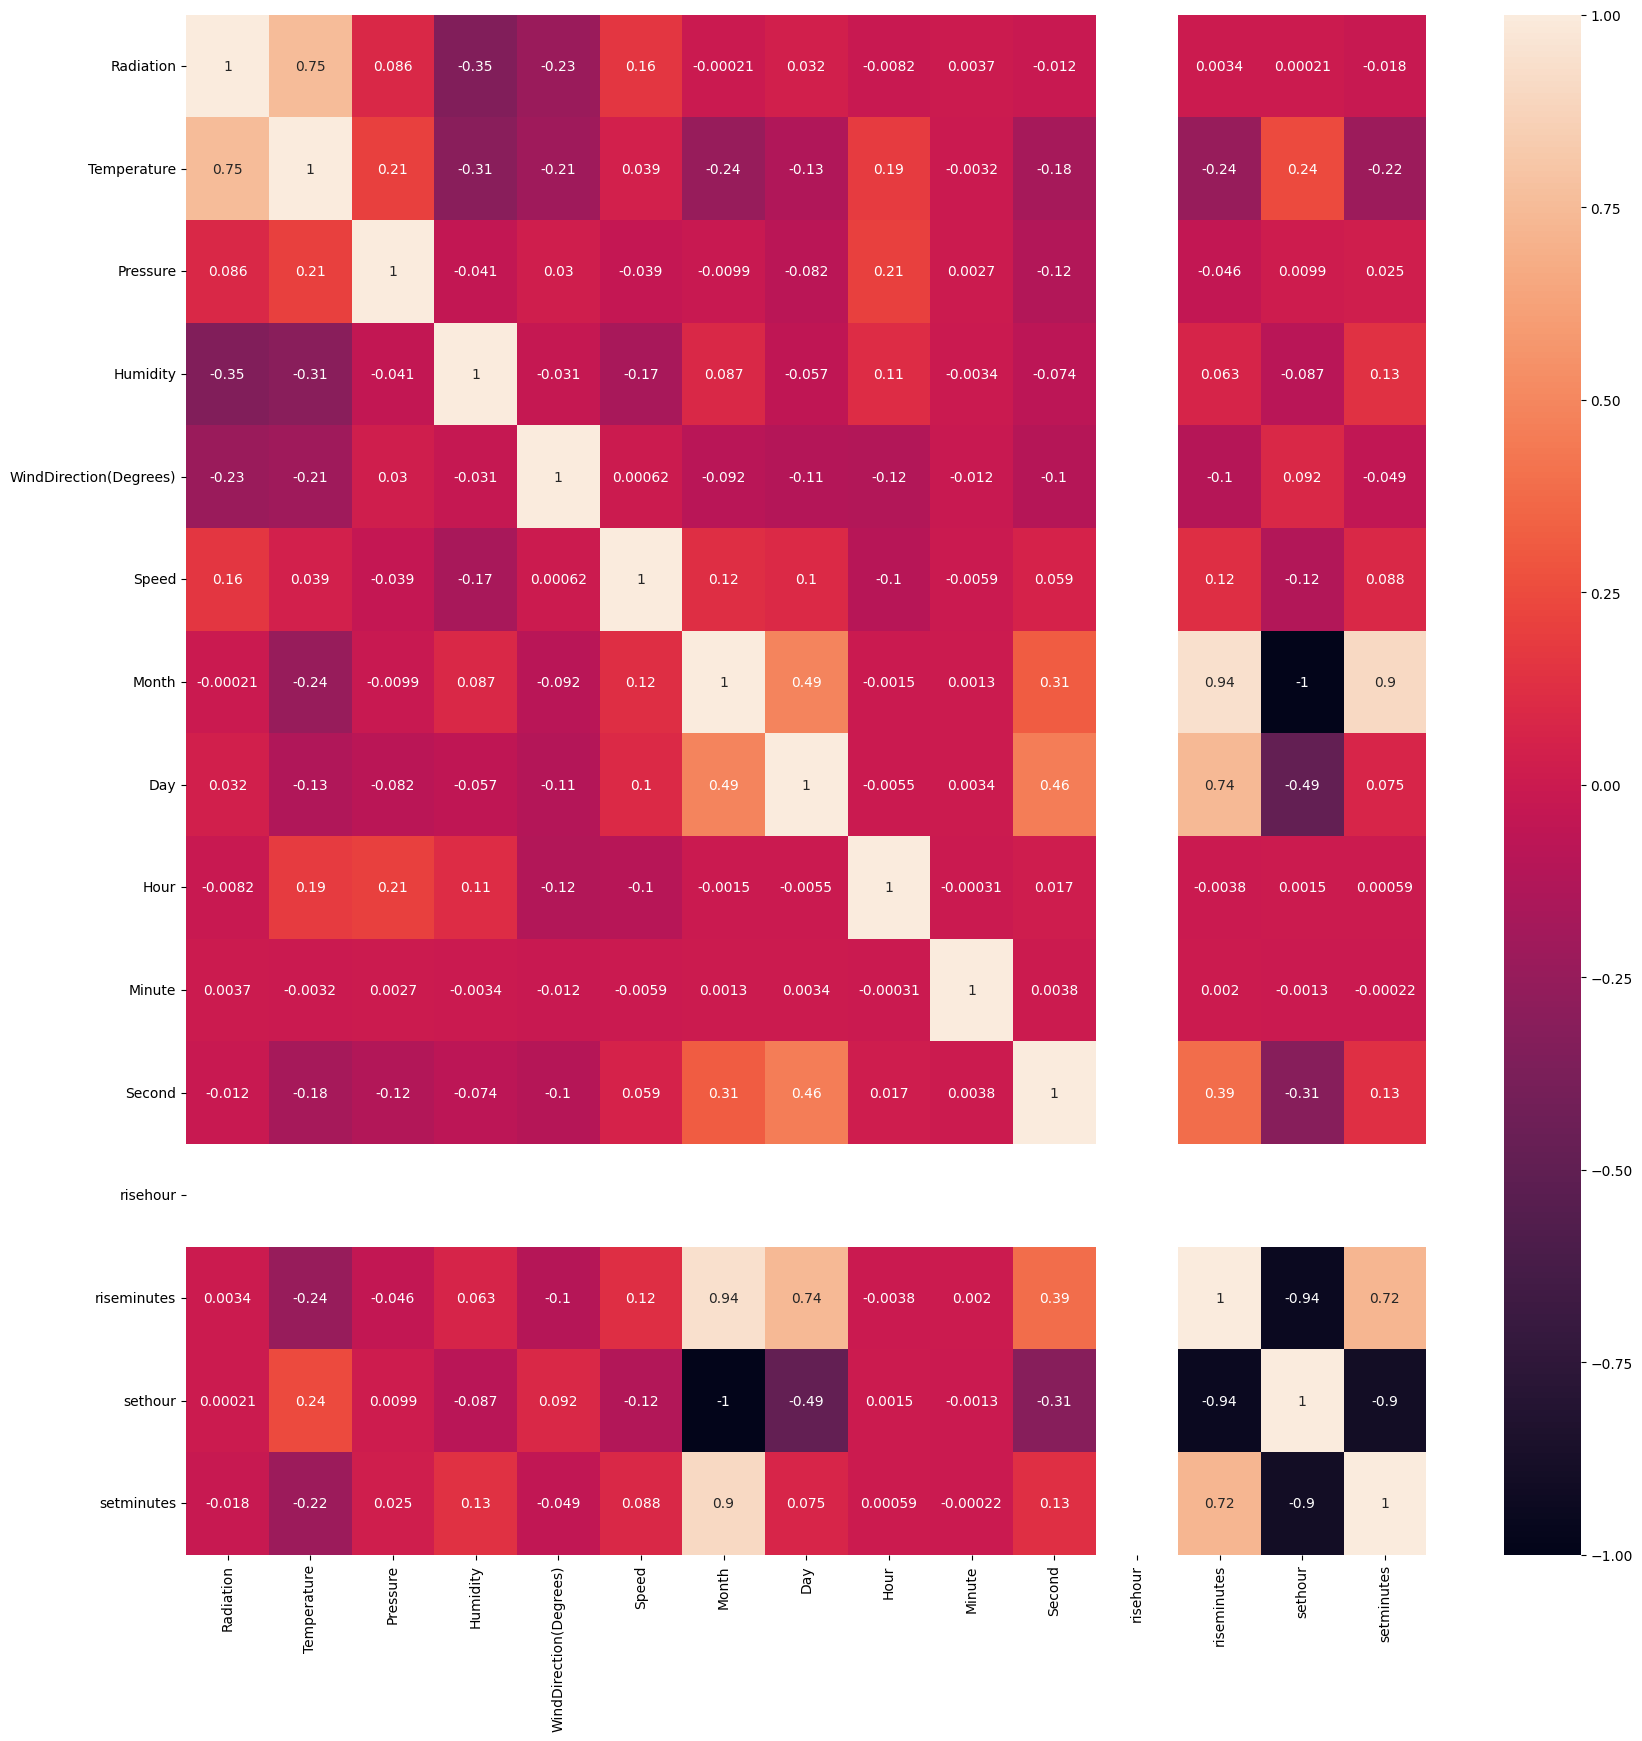

In [33]:
# plot the correlation matrix using heatmap for clear understanding
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True)
plt.show()

# Feature Selection using SelectKBest Method

In [34]:
bestfeatures = SelectKBest(score_func = chi2, k = 10)

It works on the target label but instead we are passsing continuous float values to it. So, we need to convert our data to label form and there are two methods as follows:
- usign LabelEncoder
- multiplying the data by 100 and converting it to int which can be treated as labels by the model

In [35]:
# use the label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_Y = label_encoder.fit_transform(target)

In [36]:
target_cont = df1['Radiation'].apply(lambda x : int(x*100))
scaled_input_features = MinMaxScaler().fit_transform(input_features)
fit = bestfeatures.fit(scaled_input_features, target_cont)

In [37]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(input_features.columns)

In [38]:
# contatinating data_features with the scores
featureScores = pd.concat([column, scores], axis=1)

#naming the dataframe columns
featureScores.columns = ['Features', 'feature_imp']

In [39]:
# best features
featureScores.sort_values(by = 'feature_imp', ascending=False, inplace=True)
featureScores

,Features,feature_imp
5,Month,4675.916599
12,sethour,2732.924155
11,riseminutes,2152.354110
13,setminutes,1356.560897
3,WindDirection(Degrees),1315.320285
6,Day,1292.029242
8,Minute,1128.870794
0,Temperature,1023.804229
4,Speed,489.166520
2,Humidity,412.772892


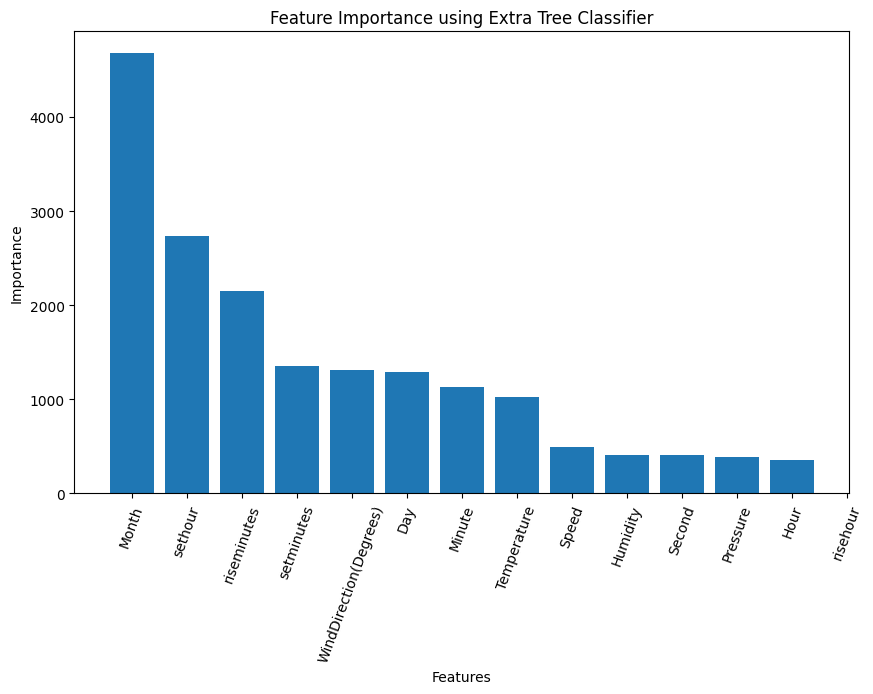

In [40]:
# visualise the feature importance
plt.figure(figsize = (10, 6))
plt.bar(featureScores.Features, featureScores.feature_imp)
plt.xticks(rotation = 70)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance using Extra Tree Classifier")
plt.show()

# Feature Selection using Extra Tree Classifier

In [41]:
model = ExtraTreesClassifier(verbose = 2, n_estimators = 10)
model.fit(scaled_input_features, target_cont)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


ExtraTreesClassifier(n_estimators=10, verbose=2)

In [42]:
feature_importances = pd.DataFrame(model.feature_importances_, index = input_features.columns, columns = ["feature_imp"])
feature_importances.sort_values(by = 'feature_imp', ascending=False, inplace = True)
feature_importances

,feature_imp
WindDirection(Degrees),0.158212
Minute,0.148347
Second,0.124774
Speed,0.123537
Humidity,0.116056
Hour,0.091368
Temperature,0.086430
Pressure,0.076556
Day,0.031558
setminutes,0.027741


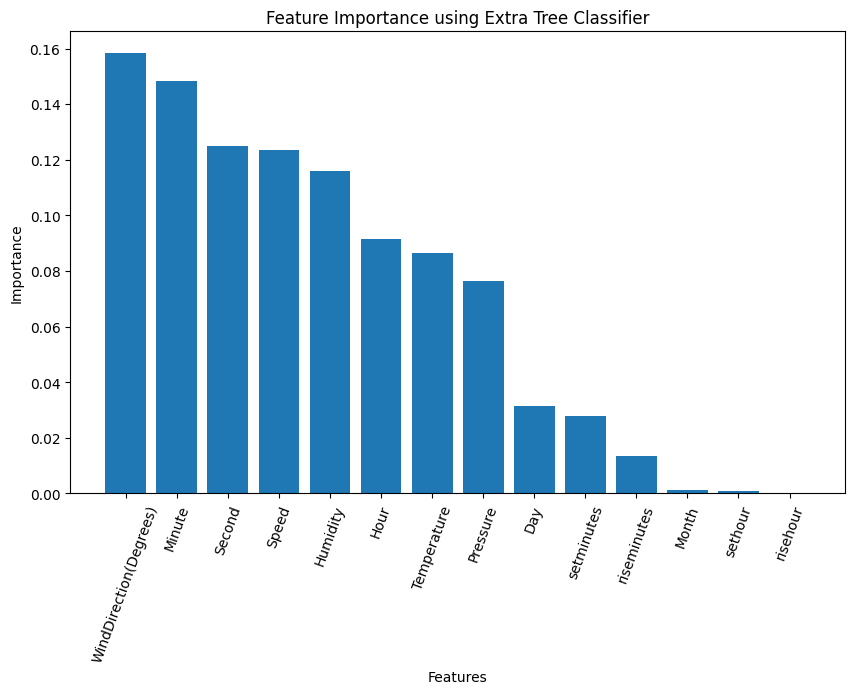

In [43]:
plt.figure(figsize = (10, 6))
plt.bar(feature_importances.index, feature_importances["feature_imp"])
plt.xticks(rotation = 70)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance using Extra Tree Classifier")
plt.show()

# Feature Engineering with BoxCox, Log, Min-Max and Standard transformation

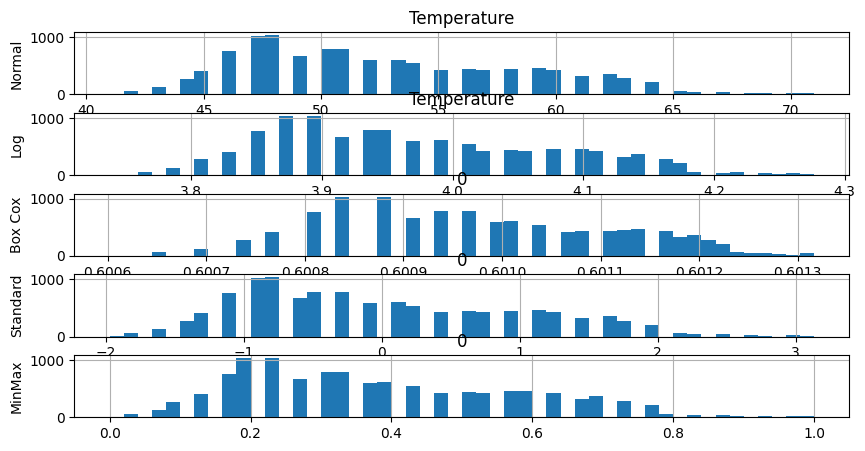

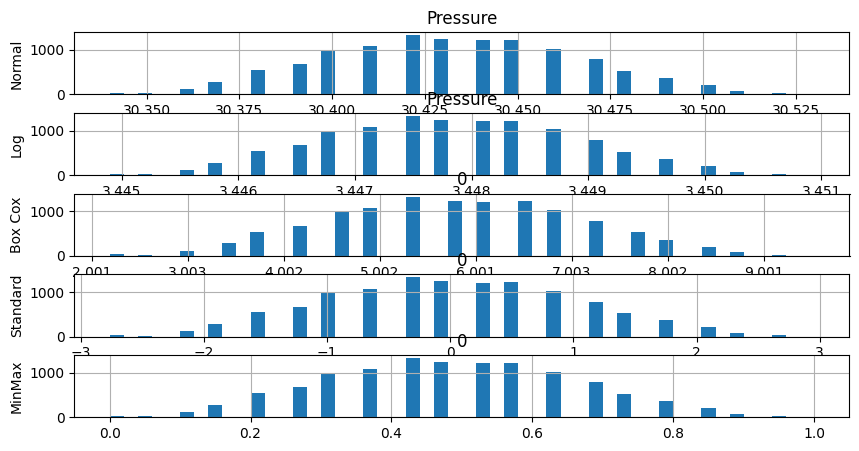

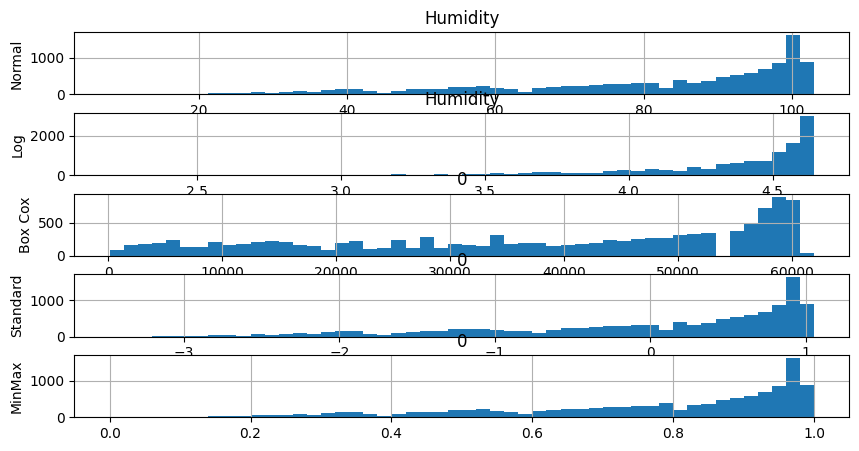

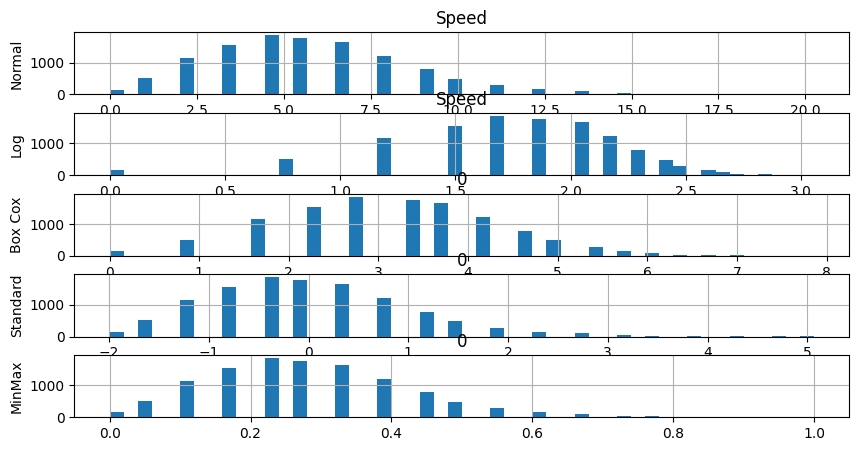

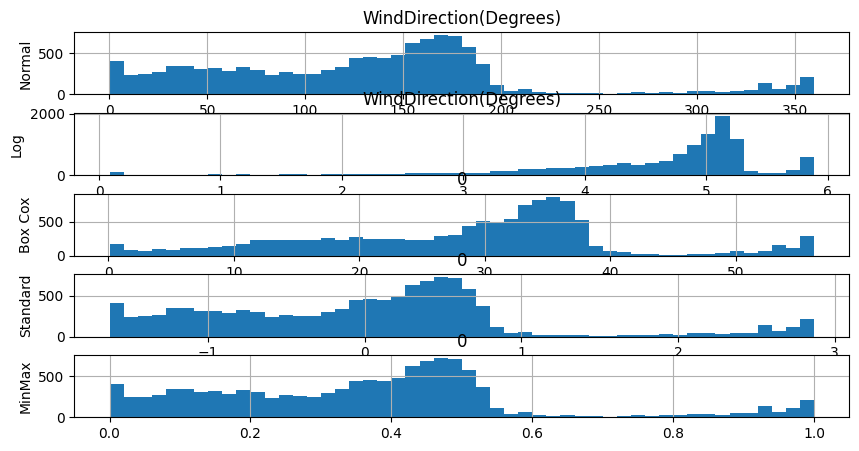

In [44]:
# Looking for transformation
features_to_transform = ['Temperature', 'Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)']

for i in features_to_transform:

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 5))

    pd.DataFrame(input_features[i]).hist(ax = ax1, bins = 50)
    pd.DataFrame((input_features[i]+1).transform(np.log)).hist(ax = ax2, bins = 50)
    pd.DataFrame(stats.boxcox(input_features[i]+1)[0]).hist(ax = ax3, bins = 50)
    pd.DataFrame(StandardScaler().fit_transform(np.array(input_features[i]).reshape(-1, 1))).hist(ax = ax4, bins = 50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(input_features[i]).reshape(-1, 1))).hist(ax = ax5, bins = 50)

    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Box Cox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')

In [45]:
# set the transformations required
transform = {'Temperature' : (input_features['Temperature']+1).transform(np.log),
             'Pressure': stats.boxcox(input_features['Pressure']+1)[0],
            'Humidity' : stats.boxcox(input_features['Humidity']+1)[0],
            'Speed' : (input_features['Speed']+1).transform(np.log),
            'WindDirection(Degrees)' : MinMaxScaler().fit_transform(
                np.array(input_features['WindDirection(Degrees)']).reshape(-1, 1))}

for i in transform:
    input_features[i] = transform[i]

In [46]:
input_features.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminutes,sethour,setminutes
0,3.89182,0.137182,14990.981483,0.492719,1.890095,9,29,23.0,55.0,26.0,6.0,13.0,18.0,13.0
1,3.89182,0.137182,14354.838190,0.491024,1.474763,9,29,23.0,50.0,23.0,6.0,13.0,18.0,13.0
2,3.89182,0.137182,13735.503580,0.440918,1.474763,9,29,23.0,45.0,26.0,6.0,13.0,18.0,13.0
3,3.89182,0.137182,15644.098086,0.382448,1.474763,9,29,23.0,40.0,21.0,6.0,13.0,18.0,13.0
4,3.89182,0.137182,17001.904015,0.291407,1.890095,9,29,23.0,35.0,24.0,6.0,13.0,18.0,13.0


# Preparing data - Standardisation and Splitting

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(input_features, target, test_size=0.2, random_state=1)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [48]:
xtrain.shape, xtest.shape

((9401, 14), (2351, 14))

 # Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [50]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [51]:
ypred=dtr.predict(xtest)

In [52]:
r2=r2_score(ytest,ypred)
r2

0.8760339741733036

 # Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(1000)
rf.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=1000)

In [54]:
ypred=rf.predict(xtest)

In [55]:
r2=r2_score(ypred,ytest)
r2


0.923057794264235

# Prediction with XGBoost

In [56]:
# declare parameters
params = {
    'learning_rate': 0.1,
    'max_depth': 8}

from xgboost import XGBRegressor
model = XGBRegressor(**params)

In [57]:
# train the model
model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [58]:
y_pred = model.predict(xtest)

In [61]:
r2 = r2_score(ytest, y_pred)
r2


0.9276363077448211